In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import sklearn
from mlxtend.plotting import heatmap
import seaborn as sns
import pprint

import os

pp = pprint.PrettyPrinter()

## Exploratory Data Analysis

### Load Data

In [2]:
# Get current working directory for repo
working_dir = os.getcwd()

# read the original / raw Occupancy_Estimation.csv data source
df = pd.read_csv(working_dir + '/data/raw/Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


### Prepocessing, Cleansing, Feature Engineering

In [3]:
# Check for NA values
print(df.isna().sum())

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


In [4]:
# ID original features and labels
print('Total number of columns:', len(df.columns))
features = df.columns[:18]
print('Original Features:', features)
label = [df.columns[-1]]
print('Original Label:', label)
print('Class labels:', df[label[0]].unique())
print('Original Shape:', df.shape)

Total number of columns: 19
Original Features: Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')
Original Label: ['Room_Occupancy_Count']
Class labels: [1 2 3 0]
Original Shape: (10129, 19)


In [5]:
# Combine date and time into a single timestamp
timestamp = pd.to_datetime(df["Date"].astype(str) + df["Time"], format="%Y/%m/%d%H:%M:%S")

# Insert combined datetime into first column of df
df.insert(0, "Timestamp", timestamp)

# Drop previous date and time columns
df.drop(columns=["Date", "Time"], inplace=True)

# Add occupied bool as potential output for EDA only
df["Occupied"] = (df["Room_Occupancy_Count"] > 0).astype(int)

In [6]:
# Check counts of all features to ensure ==
df.count()

Timestamp               10129
S1_Temp                 10129
S2_Temp                 10129
S3_Temp                 10129
S4_Temp                 10129
S1_Light                10129
S2_Light                10129
S3_Light                10129
S4_Light                10129
S1_Sound                10129
S2_Sound                10129
S3_Sound                10129
S4_Sound                10129
S5_CO2                  10129
S5_CO2_Slope            10129
S6_PIR                  10129
S7_PIR                  10129
Room_Occupancy_Count    10129
Occupied                10129
dtype: int64

In [7]:
# Check data types of columns
df.dtypes

Timestamp               datetime64[ns]
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
Occupied                         int64
dtype: object

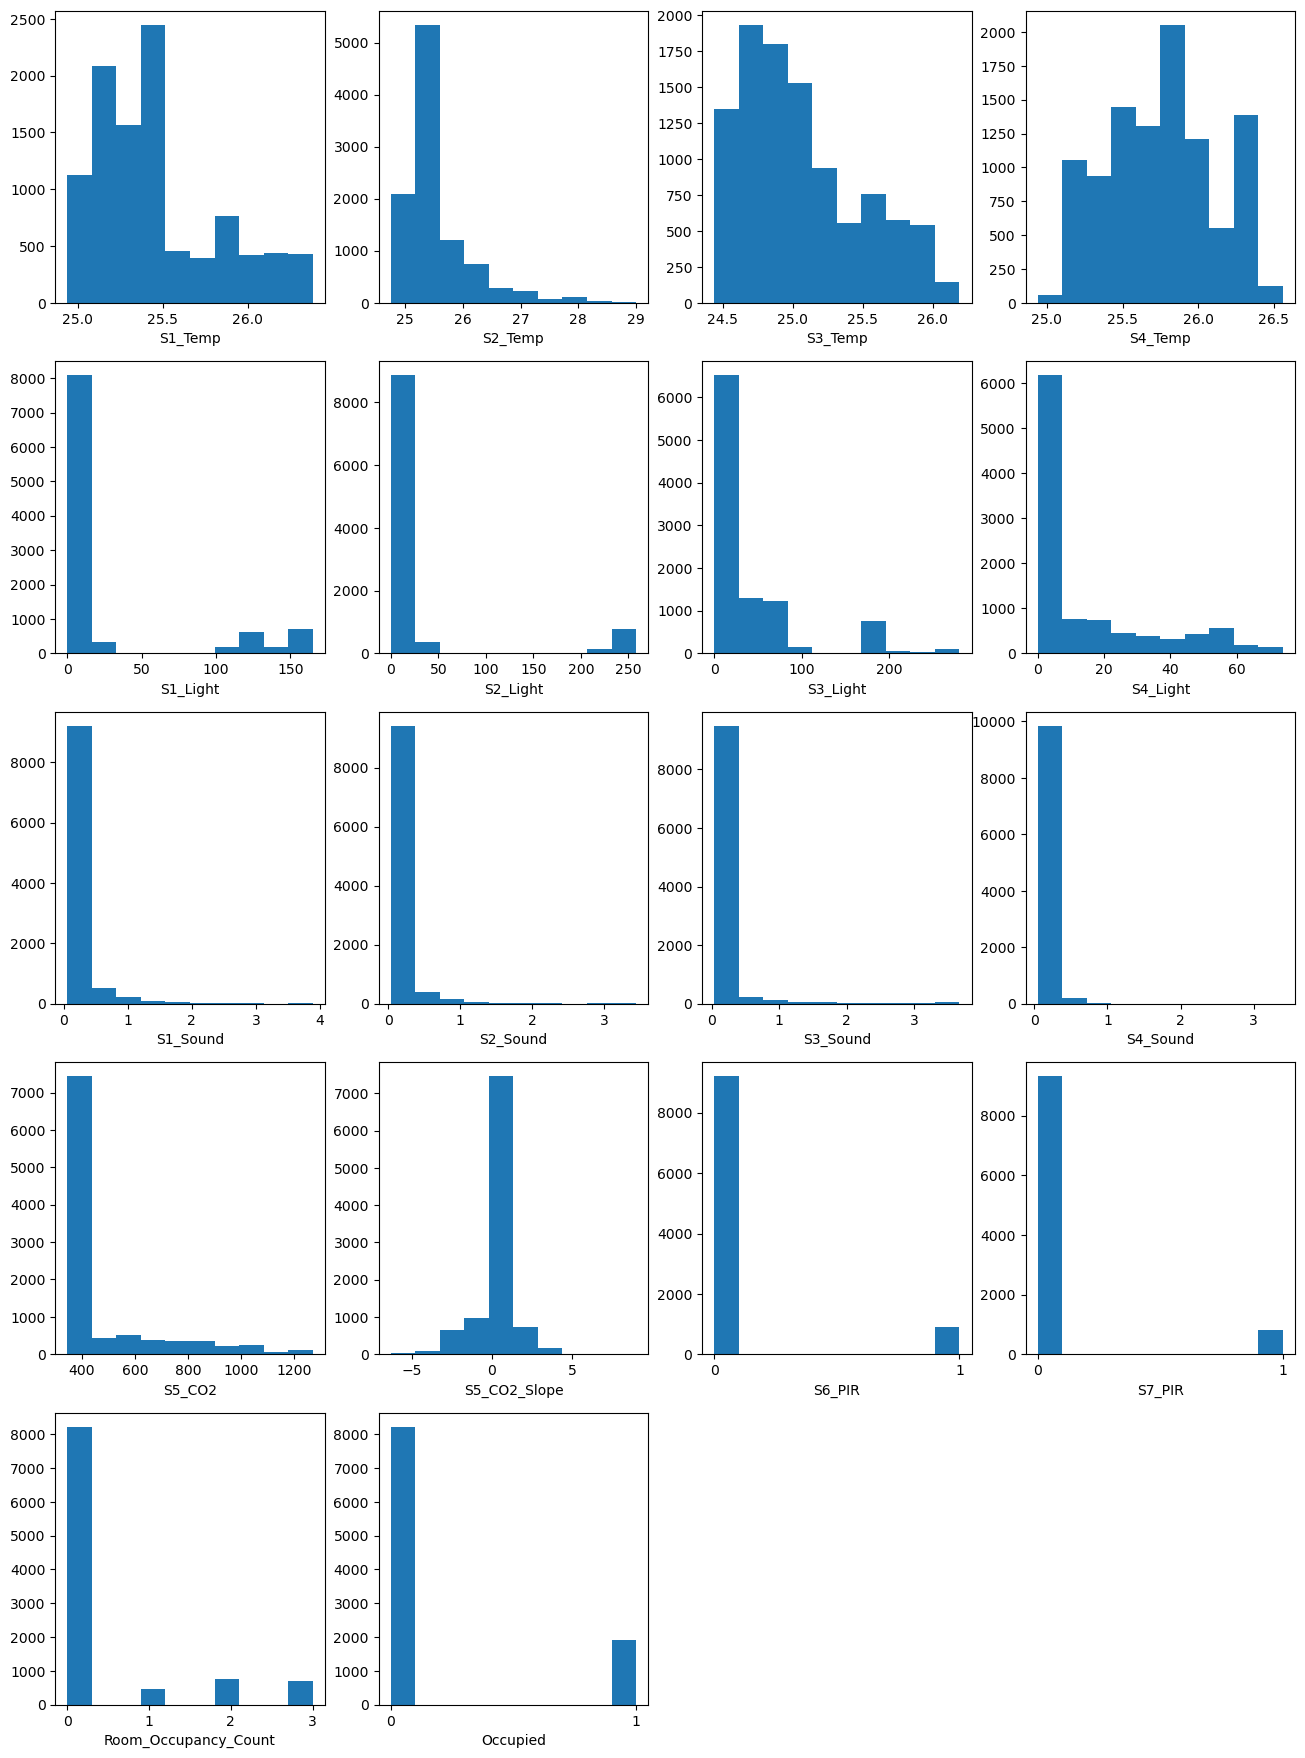

In [8]:
# Create Histograms for features to visualize distributions
columns = df.columns[1:]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,22))
for idx, ax in enumerate(axes.flatten()):
    if idx >= len(columns):
        break
    # plot histogram
    ax.hist(df[columns[idx]])
    # set xlabel
    ax.set_xlabel(columns[idx])
axes[4][2].remove()
axes[4][3].remove()
axes[3][2].xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
axes[3][3].xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
axes[4][1].xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

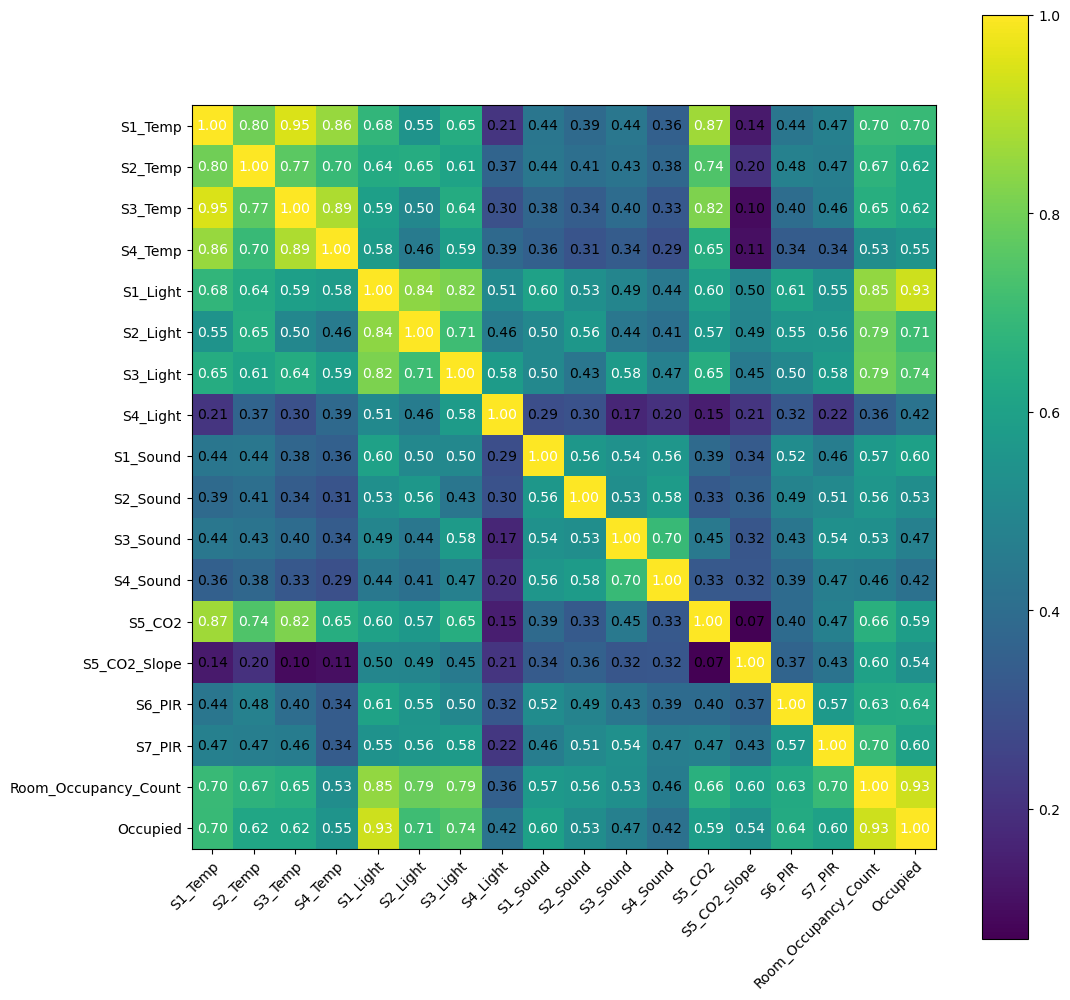

In [9]:
# Create correlation heat map to view correlations between features
columns = df.columns[1:]

cm = df[columns].corr().values 
hm = heatmap(
    cm,
    row_names=columns,
    column_names=columns,
    cmap='viridis',
    figsize=(12,12)
)

Min/Max Occupied Time: 10:49:41/19:51:46
Min/Max Unoccupied Time: 00:00:28/23:59:58
Total count of records after downsampling: 3590
Value counts for each class after downsampling:
0    1689
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64


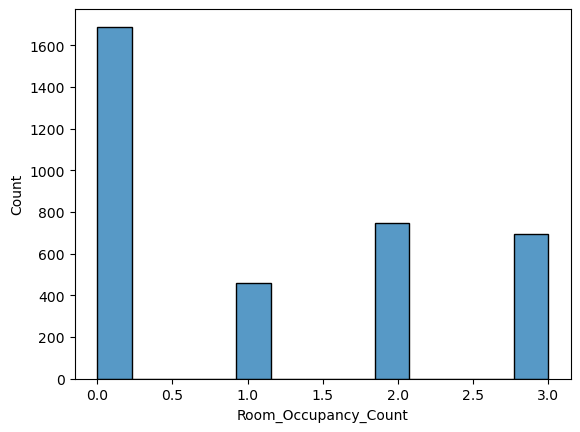

In [10]:
# Attempt to correct for class imbalance of Room_Occupancy_Count
# Downsample the majority class (Room_Occupancy_Count == 0)
# by keeping only records between the min_occupied_time and max_occupied_time 

# Define min and max occupied time
min_occupied_time = df[df["Room_Occupancy_Count"].ge(1)]["Timestamp"].dt.time.min()
max_occupied_time = df[df["Room_Occupancy_Count"].ge(1)]["Timestamp"].dt.time.max()

# Define min and max unoccupied time
min_unoccupied_time = df[df["Room_Occupancy_Count"] == 0]["Timestamp"].dt.time.min()
max_unoccupied_time = df[df["Room_Occupancy_Count"] == 0]["Timestamp"].dt.time.max()

print(f"Min/Max Occupied Time: {min_occupied_time}/{max_occupied_time}")
print(f"Min/Max Unoccupied Time: {min_unoccupied_time}/{max_unoccupied_time}")

# determine number of records remainging after downsampling the majority class
record_count_after_filter = df[df["Timestamp"].dt.time.between(min_occupied_time, max_occupied_time)]["Room_Occupancy_Count"].count()
print('Total count of records after downsampling:', record_count_after_filter)
room_occupancy_value_count_after_filter = df[df["Timestamp"].dt.time.between(min_occupied_time, max_occupied_time)]["Room_Occupancy_Count"].value_counts()
print('Value counts for each class after downsampling:')
print(room_occupancy_value_count_after_filter)

sns.histplot(df[df["Timestamp"].dt.time.between(min_occupied_time, max_occupied_time)]["Room_Occupancy_Count"])
plt.show()

## Model Pipeline

### Define helper functions

In [11]:
# Andre's function to split the dataset into train, validation, and test data
def split_data(X, y, split=(0.6, 0.2, 0.2), seed=888):
  """
  Splits X/y into training, validation, and testing sets based on the
  specified split.

  Parameters
  ----------
  X : np.ndarray
    An array-like collection of sample points
  y : np.ndarray
    The class labels of the data, should match the length of data
  split : tuple
    The percentage allocation of training, validation, and test datasets

  Returns
  -------
  splits : tuple
    The training, validation, and test datasets with their labels
    Defaults to a train/validation/test split of 60%/20%/20%
  """
  # Input checking
  if len(X) != len(y):
    raise ValueError(f"X and y lengths don't match ({len(X)} != {len(y)})")
  if len(split) != 3:
    raise ValueError("Invalid split, expected 3 percentages (training, validation, test)")
  if sum(split) != 1:
    raise ValueError(f"Invalid split {split}, percentages must sum to 1!")
  if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
    raise TypeError("X and y must be numpy arrays")

  # Initial split for testing data
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
      X, y, test_size=split[2], random_state=seed, stratify=y)

  # Further split for validation data
  val_size = split[1] / (1 - split[2])
  X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
      X_train, y_train, test_size=val_size, random_state=seed, stratify=y_train)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [12]:
def calculate_specificities(true_labels, predicted_labels, labels=[0, 1, 2, 3]):
    """
    Calculates the macro average specificity, micro average specificity and weighted average specificity
    from the given true and predicted labels

    Parameters
    ----------
    true_labels : np.ndarray
        An array-like collection of the true labels a model is trying to predict
    predicted_labels : np.ndarray
        An array-like collection of the predicted labels output from a model
    labels : list
        The set of unique class labels in the given classification problem
        Default: [0, 1, 2, 3]

    Returns
    -------
    macro_avg_specificity : float
        The macro average specificity for the model. The function calculates specificity for each class individually
        and takes the unweighted mean of all values    
    micro_avg_specificity : float
        The micro average specificity for the model. The function considers the total True Negatives (TN) and total False Positives (FP)
        amongst all classes and calculates specificity globally for the model
    weighted_avg_specificity: float
        The support weighted average specificity for the model. The function calculates specificity for each class individually
        and takes the weighted mean of all values based on the support of each class
    
    """

    # Calculate TN / TP / FN / FP
    mcm = sklearn.metrics.multilabel_confusion_matrix(y_test, baseline_pred, labels= [0,1,2,3])
    TN = mcm[:,0,0]
    TP = mcm[:,1,1]
    FN = mcm[:,1,0]
    FP = mcm[:,0,1]

    # Calculate specificity for each class (TN/(TN+FP))
    specificity = TN / (TN+FP)
    print('\nspecificity for each class [0, 1, 2, 3]:', specificity)

    # calculate macro specificity
    macro_avg_specificity = round((sum(specificity)/len(specificity)),5)

    # calculate micro specificity
    micro_avg_specificity = round((sum(TN)/(sum(TN)+sum(FP))),5)
    
    support = np.unique(true_labels, return_counts=True)[1]
    weights = support/sum(support)
    weighted_avg_specificity = round(sum(specificity*weights),5)

    return macro_avg_specificity, micro_avg_specificity, weighted_avg_specificity

### Load Data

In [14]:
# Get current working directory for repo
working_dir = os.getcwd()

# read the original / raw Occupancy_Estimation.csv data source
df = pd.read_csv(working_dir + '/data/raw/Occupancy_Estimation.csv')

### Feature Engineering

In [15]:
# Combine date and time into a single timestamp
timestamp = pd.to_datetime(df["Date"].astype(str) + df["Time"], format="%Y/%m/%d%H:%M:%S")
df.insert(0, "Timestamp", timestamp)
df.drop(columns=["Date", "Time"], inplace=True)

# Find min/max occupied times
min_occupied_time = df[df["Room_Occupancy_Count"] == 1]["Timestamp"].dt.time.min()
max_occupied_time = df[df["Room_Occupancy_Count"] == 1]["Timestamp"].dt.time.max()

### Split data into train/validation/test sets

In [16]:
# Generate numpy arrays of data
X = df[list(df.columns)[:-1]].values # Exclude Room_Occupancy_Count
y = df["Room_Occupancy_Count"].values

# Split data into train/validation/test sets with default 60/20/20 split
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

### Correct for class imbalance of Room_Occupancy_Count

In [17]:
# Downsample majority class in training data
mask_func = np.vectorize(lambda x: (x.time() > min_occupied_time) & (x.time() < max_occupied_time))
mask = mask_func(X_train[:, 0])

X_train = X_train[mask]
y_train = y_train[mask]

# Get rid of timestamp columns
X_train = X_train[:, 1:]
X_val = X_val[:, 1:]
X_test = X_test[:, 1:]

### Set Baseline Model to always predict unoccupied

In [18]:
# Baseline model always predicts Room_Occupancy_Count == 0
baseline_pred = np.zeros(y_test.shape)


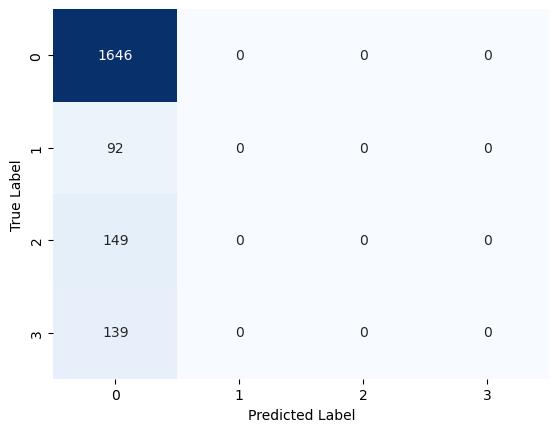

In [19]:
### Evaluate specificity of baseline model
# Create confusion matrix for actual and baseline predictions of y_test
conf_mat_baseline = sklearn.metrics.confusion_matrix(y_test, baseline_pred)
conf_mat_baseline = sns.heatmap(conf_mat_baseline, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
# Evaluate model by calculating Macro, Micro, and Weighted Specificities
macro_spec_baseline, micro_spec_baseline, weighted_spec_baseline = calculate_specificities(y_test, baseline_pred)

print('Macro Specificity:', macro_spec_baseline)
print('Micro Specificity:', micro_spec_baseline)
print('Weighted Specificity:', weighted_spec_baseline)


specificity for each class [0, 1, 2, 3]: [0. 1. 1. 1.]
Macro Specificity: 0.75
Micro Specificity: 0.93748
Weighted Specificity: 0.18756
